   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  US-2021-103800 2021-01-03 2021-01-07  Standard Class    DP-13000   
1       2  US-2021-112326 2021-01-04 2021-01-08  Standard Class    PO-19195   
2       3  US-2021-112326 2021-01-04 2021-01-08  Standard Class    PO-19195   
3       4  US-2021-112326 2021-01-04 2021-01-08  Standard Class    PO-19195   
4       5  US-2021-141817 2021-01-05 2021-01-12  Standard Class    MB-18085   

   Customer Name      Segment Country/Region          City  ... Postal Code  \
0  Darren Powers     Consumer  United States       Houston  ...       77095   
1  Phillina Ober  Home Office  United States    Naperville  ...       60540   
2  Phillina Ober  Home Office  United States    Naperville  ...       60540   
3  Phillina Ober  Home Office  United States    Naperville  ...       60540   
4     Mick Brown     Consumer  United States  Philadelphia  ...       19143   

    Region       Product ID         Category Sub-C

/tmp/ipython-input-6-3546953391.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='Set2')


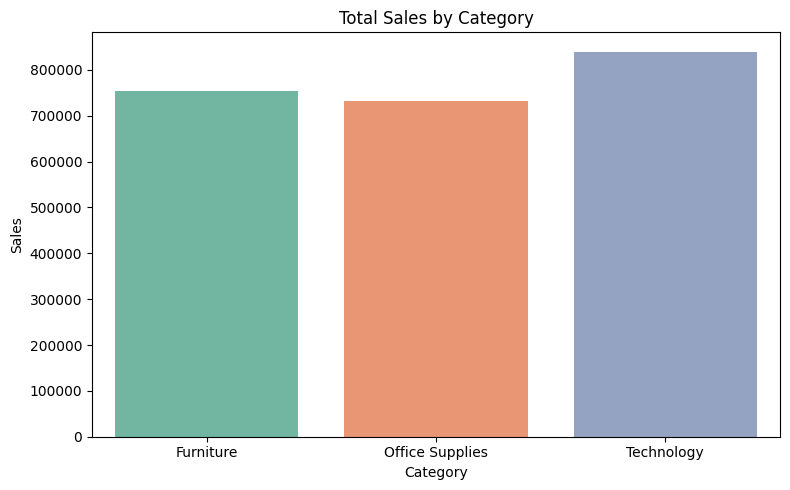

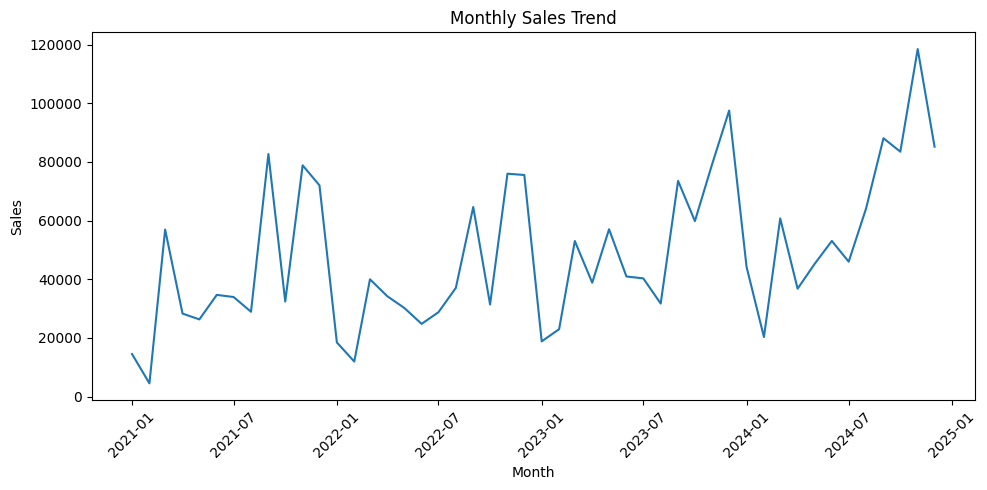

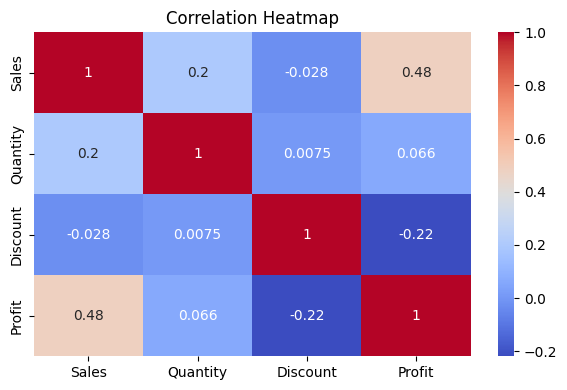

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_excel("/content/Sample - Superstore.xls")

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check first few rows
print(df.head())

# Total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Barplot: Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='Set2')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Lineplot: Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Correlation
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Plotly Interactive Line Chart
fig = px.line(monthly_sales, x='Month', y='Sales', title='Interactive Monthly Sales Trend')
fig.show()